In [1]:
# 1. Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# 2. Importing the dataset

In [4]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test)=fashion_mnist.load_data()

In [5]:
# 3. Preprocessing

In [6]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Train_datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Test_datagen=ImageDataGenerator(rescale=1/255)

In [7]:
X_train=X_train.reshape(60000, 28, 28, 1)
X_test=X_test.reshape(10000, 28, 28, 1)
Train_Set=Train_datagen.flow(X_train, Y_train, batch_size=32)
Test_Set=Test_datagen.flow(X_test, Y_test, batch_size=32)

In [8]:
# 4. Building the CNN

In [9]:
cnn=tf.keras.models.Sequential()

In [10]:
## 4.1 Convolution Layer - 1

In [11]:
from keras.layers import BatchNormalization, Dropout
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
cnn.add(Dropout(0.2))

In [12]:
## 4.2 Convolution Layer - 2

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
cnn.add(Dropout(0.3))

In [14]:
## 4.3 Convolution Layer - 3

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
cnn.add(Dropout(0.4))

In [16]:
## 4.4 Flattening

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
## 4.5 Full Connection

In [19]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

In [20]:
## 4.6 Output Layer

In [21]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [22]:
# 5. History Data

In [23]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [24]:
# 6. Compiling and Fitting

In [25]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(Train_Set, validation_data=(Test_Set), epochs=40)

Epoch 1/40
1875/1875 [==============================] - 194s 103ms/step - loss: 1.2482 - accuracy: 0.5732 - val_loss: 0.6164 - val_accuracy: 0.7672
Epoch 2/40
1875/1875 [==============================] - 190s 101ms/step - loss: 0.6955 - accuracy: 0.7463 - val_loss: 0.5392 - val_accuracy: 0.7921
Epoch 3/40
1875/1875 [==============================] - 182s 97ms/step - loss: 0.6254 - accuracy: 0.7706 - val_loss: 0.4905 - val_accuracy: 0.8073
Epoch 4/40
1875/1875 [==============================] - 161s 86ms/step - loss: 0.5840 - accuracy: 0.7887 - val_loss: 0.4205 - val_accuracy: 0.8440
Epoch 5/40
1875/1875 [==============================] - 162s 86ms/step - loss: 0.5566 - accuracy: 0.7994 - val_loss: 0.4605 - val_accuracy: 0.8170
Epoch 6/40
1875/1875 [==============================] - 161s 86ms/step - loss: 0.5360 - accuracy: 0.8051 - val_loss: 0.4266 - val_accuracy: 0.8254
Epoch 7/40
1875/1875 [==============================] - 161s 86ms/step - loss: 0.5155 - accuracy: 0.8166 - val_loss:

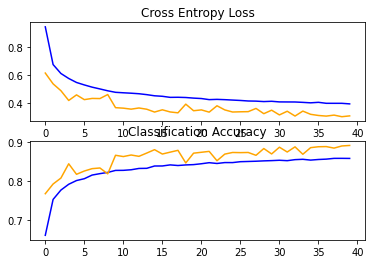

In [26]:
summarize_diagnostics(history)

In [27]:
# 7. Predictions

In [28]:
from keras.preprocessing import image
img=X_test[2]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
#print(result)
print(pred)

1


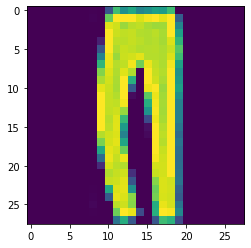

In [29]:
plt.imshow(X_test[2])

In [30]:
print(Y_test[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
